In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import openexplorer as oe
import numpy as np
from simtk import unit
from simtk.openmm import app
import matplotlib.pyplot as plt

# MonteCarlo

In [3]:
modeller = msm.convert('alanine_dipeptide.pdb', to_form='openmm.Modeller')

topology = modeller.topology
positions = modeller.positions

forcefield = app.ForceField('amber10.xml', 'amber10_obc.xml')
system = forcefield.createSystem(topology, constraints=app.HBonds, nonbondedMethod=app.NoCutoff)

explorer = oe.Explorer(topology, system, platform='CUDA')

In [4]:
explorer.set_coordinates(positions)

In [5]:
explorer.quench()

In [6]:
movement = oe.movements.RandomDihedralMaxShifts(stepsize=45*unit.degrees)

In [7]:
reporter = oe.reporters.OpenExplorerReporter(1, step=True, coordinates=True, boxVectors=False,
                                             potentialEnergy=True)

In [8]:
exploration = oe.exploration_campaign.MonteCarlo(explorer, movement, temperature=300.0*unit.kelvin,
                                                 reporter=reporter)

In [9]:
exploration.run(1000)

In [10]:
exploration.n_tries

1000

In [11]:
exploration.n_acceptances

256

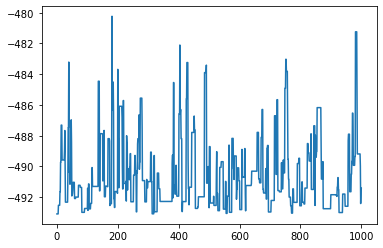

In [12]:
plt.plot(exploration.reporter.step, exploration.reporter.potential_energy._value)
plt.show()

In [13]:
view = msm.view(exploration.reporter)
view.clear()
view.add_licorice()
view

NGLWidget(max_frame=1000)

In [14]:
phi_chains, psi_chains, phi_angles, psi_angles = msm.ramachandran_angles(exploration.reporter)

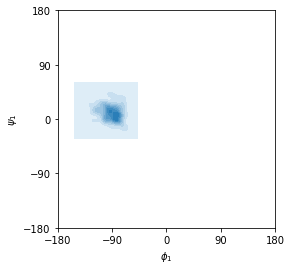

In [15]:
import seaborn as sns

ax = sns.kdeplot(phi_angles[:,0], psi_angles[:,0], shade=True)
ax.set_xlim(-180.0,180.0)
ax.set_ylim(-180.0,180.0)
ax.set_xticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_yticks([-180.0, -90.0, 0.0, 90.0, 180.0])
ax.set_xlabel('$\phi_1$')
ax.set_ylabel('$\psi_1$')
ax.set_aspect('equal')

In [16]:
msm.covalent_dihedral_quartets(exploration.reporter, dihedral_angle='phi')

array([[ 4,  6,  8, 14]])

In [17]:
msm.get_form(exploration.reporter.topology)

'molsysmt.Topology'

In [18]:
exploration.reset(temperature=900.0*unit.kelvin)

In [19]:
exploration.run(1000)

In [20]:
exploration.n_tries

1000

In [21]:
exploration.n_acceptances

437